In [ ]:
### Code creates plots for Augur analysis shown in Extended data figure 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

### Export the plots with pheatmap

In [2]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

In [3]:
%%R
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(gridExtra))

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


### Add on, have young and old in one Heatmap, with same Scale

In [4]:
%%R
tab_young <- read.delim("/home/gotej/Projects/Aging_BleoModel/Data/time_resolved_augur_scores_young.txt",
                     sep = "\t", stringsAsFactors = F, row.names = 1)
tab_old <- read.delim("/home/gotej/Projects/Aging_BleoModel/Data/time_resolved_augur_scores_old.txt",
                       sep = "\t", stringsAsFactors = F, row.names = 1)
head(tab_young, 4)

                   d3       d10       d20       d30       d37
Airway      0.7029138 0.6235828 0.5889456 0.6281859 0.6722959
Mesothelium 0.6823583 0.5780782 0.5897449 0.6446825 0.6405669
Macrophages 0.8236281 0.7673413 0.7394331 0.7828458 0.6800170
T cells     0.5527324 0.5791327 0.5889739 0.5038889 0.7444671


In [5]:
%%R
## Combine
colnames(tab_young) <- paste0("young_", colnames(tab_young))
colnames(tab_old) <- paste0("old_", colnames(tab_old))
tab_young$cell_type <- rownames(tab_young)
tab_old$cell_type <- rownames(tab_old)

tab <- merge(tab_young, tab_old, by = "cell_type")
rownames(tab) <- tab$cell_type
tab$cell_type <- NULL

#write.table(tab, file = "effect_size_DGE_logFC05_bleo_vs_control_timepoints_up_meta.csv")

head(tab, 25)

               young_d3 young_d10 young_d20 young_d30 young_d37    old_d3
Airway        0.7029138 0.6235828 0.5889456 0.6281859 0.6722959 0.6023923
Alveolum      0.8375964 0.7788435 0.7947619 0.8224320 0.7106519 0.7009977
B cells       0.5486054 0.5698243 0.6423356 0.5463152 0.7666950 0.5278685
Capillary ECs 0.5751020 0.6752438 0.6703005 0.6691440 0.7068311 0.5815306
DC            0.7695578 0.6295918 0.5712585 0.6786168 0.7103005 0.5941610
Fibroblasts   0.7333560 0.7824206 0.7313889 0.8032766 0.6631633 0.6043991
Granulocytes  0.6142177 0.7152381 0.8455329 0.6533503 0.6139739 0.5569728
Lymphatic ECs 0.7383560 0.7261905 0.6404025 0.6900057 0.6073356 0.5375283
Macrophages   0.8236281 0.7673413 0.7394331 0.7828458 0.6800170 0.6503968
Mesothelium   0.6823583 0.5780782 0.5897449 0.6446825 0.6405669 0.5495465
Monocytes     0.5836735 0.6980159 0.7128175 0.6008787 0.7779989 0.5532766
NK            0.5258957 0.5934864 0.6909184 0.5380272 0.8191553 0.5640590
Pericytes     0.5852834 0.6624546 0.54

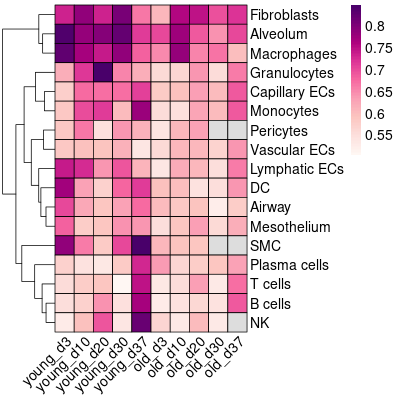

In [18]:
%%R -w 400 -h 400
p <- pheatmap( tab, scale = "none", cluster_rows = TRUE, cluster_cols = FALSE, color = colorRampPalette(brewer.pal(9, "RdPu"))(100), 
              fontsize = 14, 
              angle_col = 45, border_color = "black"
)
ggsave(file = paste0("Heatmap", "_Augur_scores_overtime.pdf"), p, width = 6, height = 6)

In [19]:
%%R
tab_baseline <- read.delim("/home/gotej/Projects/Aging_BleoModel/Data/baseline_d0_augur_scores.txt",
                       sep = "\t", stringsAsFactors = F, row.names = 1)
head(tab_baseline, 4)

            mean_augur_score
Airway             0.5593651
Mesothelium        0.5337982
Macrophages        0.5711905
T cells            0.5487982


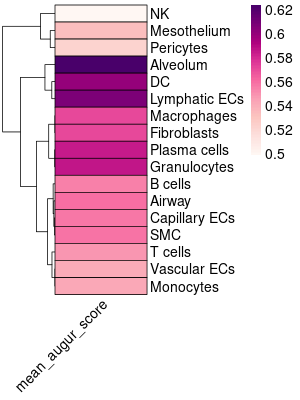

In [20]:
%%R -w 300 -h 400
p <- pheatmap(tab_baseline, scale = "none", cluster_rows = TRUE, cluster_cols = FALSE, color = colorRampPalette(brewer.pal(9, "RdPu"))(100), 
              fontsize = 14, 
              angle_col = 45, border_color = "black")

ggsave(file = paste0("Heatmap", "_Augur_scores_baseline.pdf"), p, width = 5, height = 10)